In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import optimize

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)

Populating the interactive namespace from numpy and matplotlib


## Définition des fonctions
Les fonctions étudiées sont
$$
f(x_1,x_2) = (x_1^3 - x_2)^2 + 2(x_2 - x_1)^4 \\
g(x_1, x_2) = 3x_1^2 + 8x_1x_2 + 9x_2^2 + 3x_1 - 4x_2
$$
Leurs gradients valent respectivement
$$
\nabla f(x_1,x_2) = 
\left( \begin{array}{c}
6x_1^5 - 6x_1^2x_2 - 8(x_2 - x_1)^3\\
-2x_1^3 + 2x_2 + 8(x_2 - x_1)^3\\
\end{array} \right)
$$
$$
\nabla g(x_1,x_2) = 
\left( \begin{array}{c}
6x_1 + 8x_2 + 3\\
8x_1 + 18x_2 - 4\\
\end{array} \right)
$$
De même pour leurs matrices Hessiennes
$$
Hf(x_1,x_2) = 
\left( \begin{array}{cc}
30x_1^4 - 12x_1x_2 + 24(x_2 -x_1)^2 & -6x_1^2 -24(x_2 -x_1)^2\\
-6x_1^2 -24(x_2 -x_1)^2 & 2  + 24(x_2 -x_1)^2\\
\end{array} \right)
$$
$$
Hg(x_1,x_2) = 
\left( \begin{array}{cc}
6 & 8\\
8 & 18\\
\end{array} \right)
$$

In [24]:
# Définition des fonctions à optimiser
f = lambda X : (X[0]**3 - X[1])**2 + 2*(X[1] - X[0])**4
g = lambda X : 3*X[0]**2 + 8*X[0]*X[1] + 9*X[1]**2 + 3*X[0] - 4*X[1]

# Avec leurs gradients
df = lambda X : np.r_[6*X[0]**5 - 6*X[0]**2*X[1] - 8*(X[1] - X[0])**3,
                 -2*X[0]**3 +2*X[1] + 8*(X[1] -X[0])**3]

dg = lambda X : np.r_[6*X[0] + 8*X[1] + 3,
                      8*X[0] + 18*X[1] -4]

# Et leurs matrices Hessiennes
d2f = lambda X : np.array([[30*X[0]**4 -12*X[0]*X[1] + 24*(X[1] - X[0])**2,  -6*X[0]**2 - 24*(X[1] - X[0])**2],
                           [-6*X[0]**2 - 24*(X[1] - X[0])**2, 2 + 24*(X[1] - X[0])**2]])

d2g = lambda X : np.array([[6, 8],
                           [8, 18]])

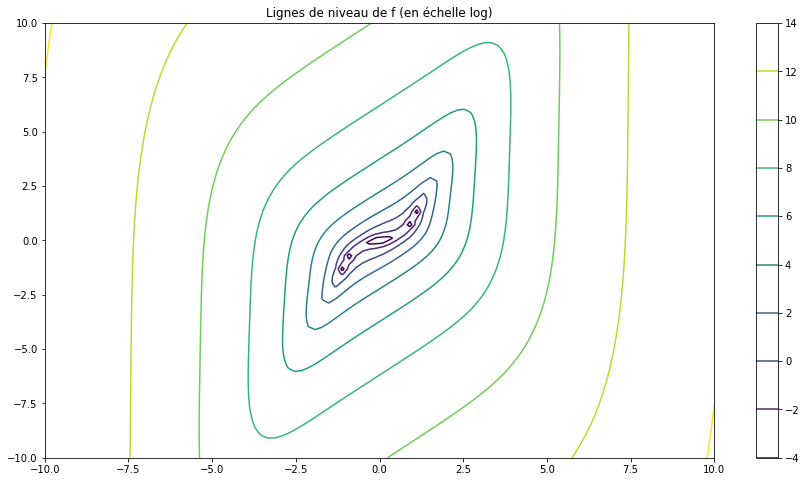

In [4]:
valeursF = [[f(np.r_[x1,x2]) for x1 in np.linspace(-10,10,100)] for x2 in np.linspace(-10,10,100)]
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),np.log(valeursF),10)
plt.colorbar()
plt.title("Lignes de niveau de f (en échelle log)")
plt.show()

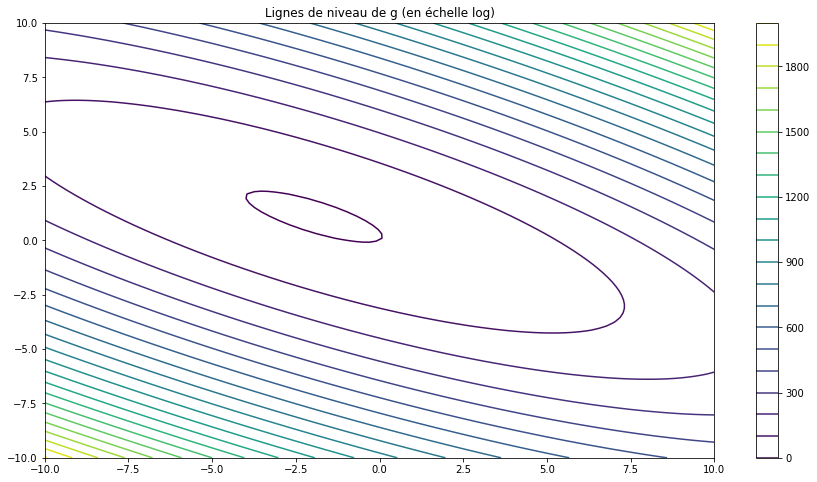

In [5]:
valeursG = [[g(np.r_[x1,x2]) for x1 in np.linspace(-10,10,100)] for x2 in np.linspace(-10,10,100)]
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),valeursG,20)
plt.colorbar()
plt.title("Lignes de niveau de g (en échelle log)")
plt.show()

# Exercice 1

## Descente de Gradient à pas constant

In [6]:
def gradient_pas_constant(f, df, x0, epsilon, alpha, N, beta, lambda_):
    xk = x0
    n = 0
    L = [x0]
    while n<N and not (np.linalg.norm(df(xk))<epsilon):
        alphak = alpha
        while f(xk - alphak*df(xk)) > f(xk) - alphak*beta*df(xk).T.dot(df(xk)):
            alphak = lambda_*alphak
        xk_next =  xk - alphak*df(xk)
        xk = xk_next
        n += 1
        L.append(xk)
        
    return xk,n,L

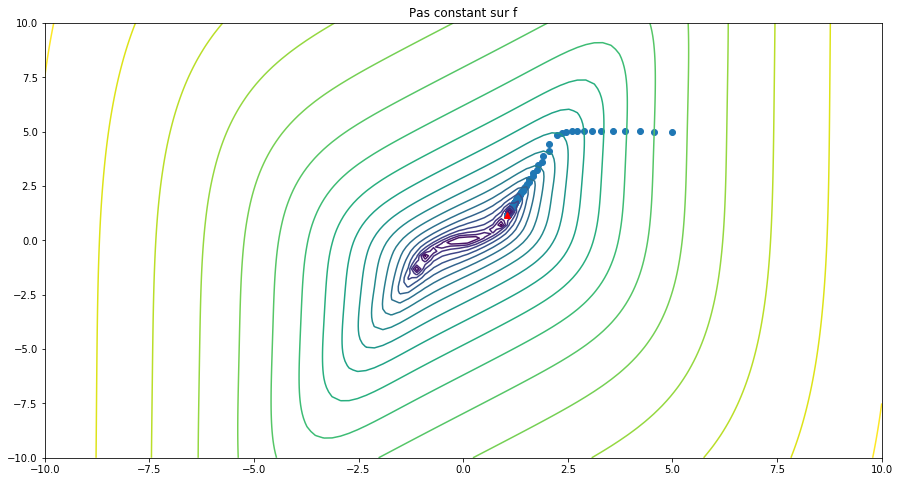

In [7]:
_,_,L = gradient_pas_constant(f,df, np.r_[5,5], 0.01, 0.01,100000, 0.8,0.8)
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),np.log(valeursF),20)
plt.scatter(np.array(L)[:,0],np.array(L)[:,1])
plt.plot(*L[-1],'r^')
plt.title("Pas constant sur f")
plt.show()

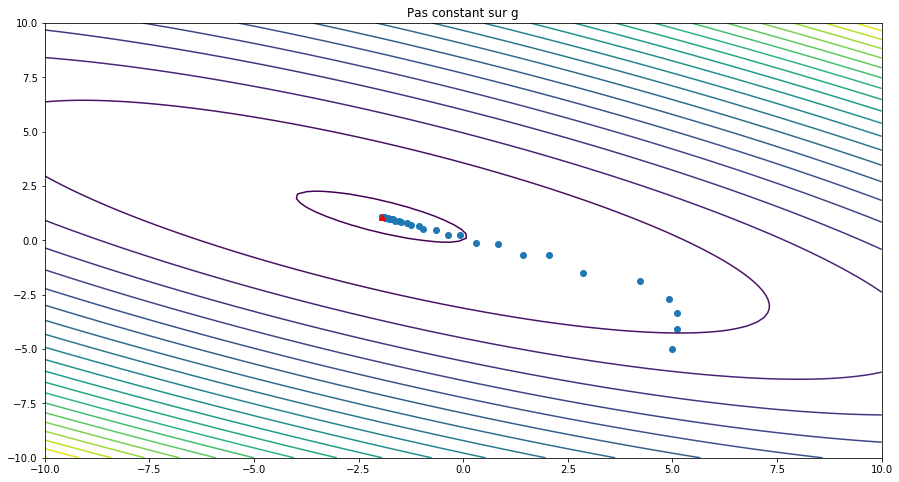

In [8]:
_,_,L = gradient_pas_constant(g,dg, np.r_[5,-5], 0.01, 0.1,100000, 0.8,0.8)
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),valeursG,20)
plt.scatter(np.array(L)[:,0],np.array(L)[:,1])
plt.plot(*L[-1],'r^')
plt.title("Pas constant sur g")
plt.show()

## Descente de gradient à pas optimal

In [122]:
def gradient_pas_optimal(f,df, x0,epsilon,N=1000):
    xk = x0
    L = [x0]
    n=0
    while n<N and not (np.linalg.norm(df(xk))<epsilon):
        alpha = optimize.line_search(f, df, xk,-df(xk))[0]
        if alpha == None:
            alpha = 0.01
            while f(xk - alpha*df(xk)) > f(xk) - alpha*0.8*df(xk).T.dot(df(xk)):
                alpha = 0.8*alpha
        xk_next =  xk - alpha*df(xk)
        xk = xk_next
        L.append(xk)
        n += 1
    return xk,L

/home/kronert/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


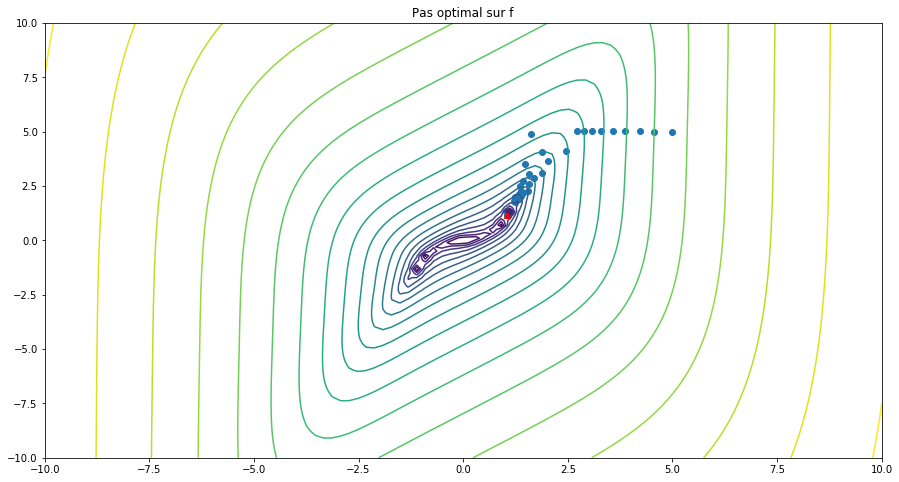

In [123]:
_,L = gradient_pas_optimal(f,df, np.r_[5,5],0.01)
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),np.log(valeursF),20)
plt.scatter(np.array(L)[:,0],np.array(L)[:,1])
plt.plot(*L[-1],'r^')
plt.title("Pas optimal sur f")
plt.show()

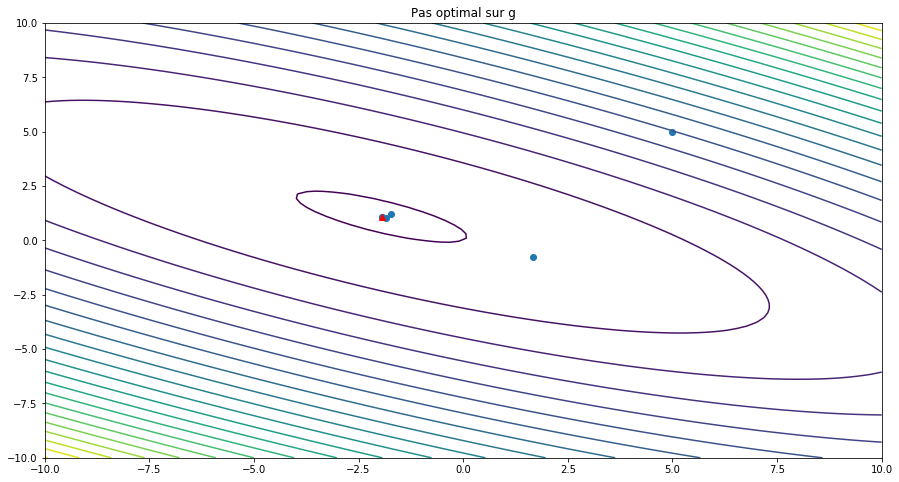

In [124]:
_,L = gradient_pas_optimal(g,dg, np.r_[5,5],0.01)
plt.contour(np.linspace(-10,10,100),np.linspace(-10,10,100),valeursG,20)
plt.scatter(np.array(L)[:,0],np.array(L)[:,1])
plt.plot(*L[-1],'r^')
plt.title("Pas optimal sur g")
plt.show()

# Exercice 2

### Moments conjugués

In [106]:
optimize.fmin_cg(f,np.r_[-5,5])
optimize.fmin_cg(f,np.r_[-5,5],fprime=df)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 104
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 26
         Gradient evaluations: 26


array([ 3.33573320e-04, -1.75922127e-08])

### Méthode de Newton

In [103]:
optimize.fmin_ncg(f,np.r_[5,5],df)
optimize.fmin_ncg(f,np.r_[5,5],df,fhess=d2f)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 132
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 42
         Hessian evaluations: 21


array([1.00264814, 1.00796524])

### BFGS

In [104]:
optimize.fmin_bfgs(f,np.r_[-5,5])
optimize.fmin_bfgs(f,np.r_[-5,5],fprime=df)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 180
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 45
         Gradient evaluations: 45


array([-1.00140472, -1.00422116])

### Force brute

In [105]:
optimize.brute(f,[(-10,10),(-10,10)])

array([0.99998603, 0.99995809])

## Comparaison des méthodes

In [125]:
# Comparaison sur f
optim = {}
x0 = np.r_[2,3]
optim["methode_pas_constant"] = lambda h,dh,d2h,n:gradient_pas_constant(h,dh, x0, 0.01, 0.1,n, 0.8,0.8)[0]
optim["methode_pas_optimal"] = lambda h,dh,d2h,n:gradient_pas_optimal(h,dh, x0,0.01,N=n)[0]
optim["methode_conjuguee"] = lambda h,dh,d2h,n:optimize.fmin_cg(h,x0,fprime=dh,maxiter=n)
optim["methode_bfgs"] = lambda h,dh,d2h,n:optimize.fmin_bfgs(h,x0,fprime=dh,maxiter=n)
optim["methode_Newton"] = lambda h,dh,d2h,n:optimize.fmin_ncg(h,x0,dh,fhess=d2h,maxiter=n)
optim["methode_brute"] = lambda h,dh,d2h,n:optimize.brute(h,[(-10,10),(-10,10)])
liste_methodes =  ["methode_pas_constant","methode_pas_optimal","methode_conjuguee","methode_bfgs","methode_Newton","methode_brute"]
from time import time
durees = {}
precisions = {}
for methode in liste_methodes:
    durees[methode] = []
    precisions[methode] = []
    for n in range(1,10):
        m = 10
        duree_moy = 0
        prec_moy = 0
        for i in range(m):
            t =time()
            x = optim[methode](f,df,d2f,n)
            t -= time()
            duree_moy += -t
            prec_moy += f(x)
        durees[methode].append(duree_moy/m)
        precisions[methode].append(prec_moy/m)

         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 8.970048
         Iterations: 1
         Function 

         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000003
         Iterations: 5
         Function evaluations: 11
         Gradient evaluations: 10
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 12
         Current function value: 0.000000
         Iterations: 6
    

         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.242196
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 0.016807
         Iterations: 5
         Function 

         Current function value: 0.000945
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 0.000883
         Iterations: 9
    

         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current function value: 0.003417
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
         Current

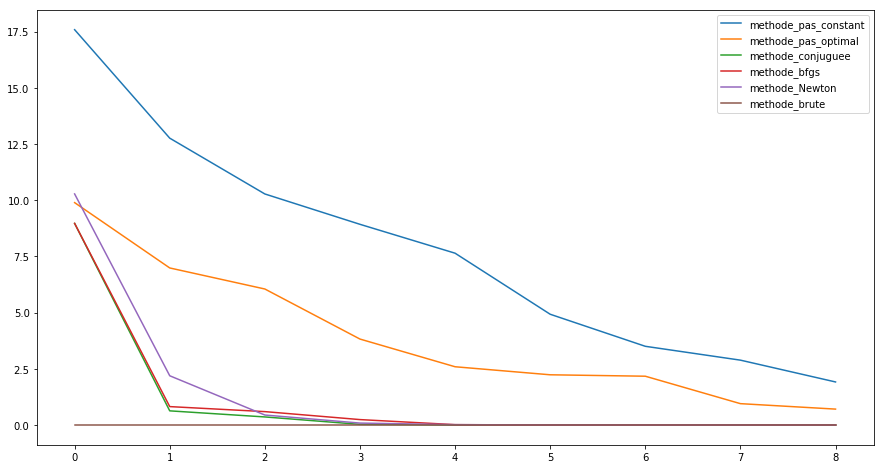

In [126]:
for methode in liste_methodes:
    plt.plot(precisions[methode],label=methode)
    plt.legend()

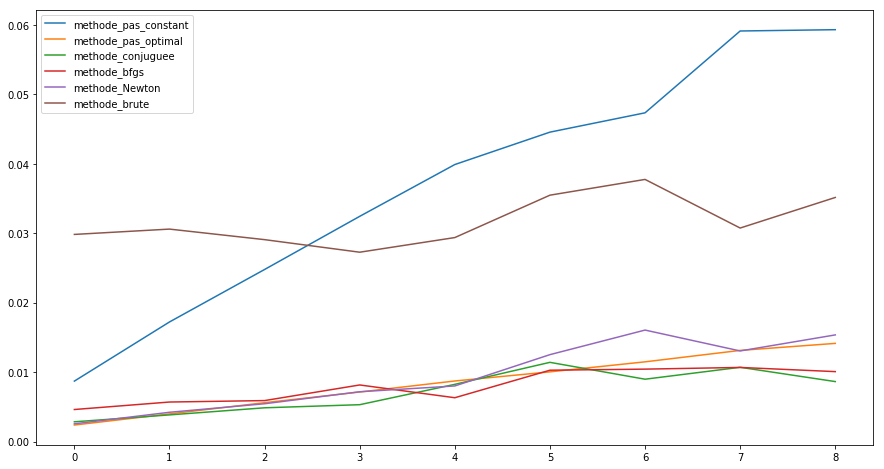

In [127]:
for methode in liste_methodes:
    plt.plot(durees[methode],label=methode)
    plt.legend()

In [128]:
# Comparaison sur g
durees = {}
precisions = {}
for methode in liste_methodes:
    durees[methode] = []
    precisions[methode] = []
    for n in range(1,20):
        m = 10
        duree_moy = 0
        prec_moy = 0
        for i in range(m):
            t =time()
            x = optim[methode](g,dg,d2g,n)
            t -= time()
            duree_moy += -t
            prec_moy += g(x)
        durees[methode].append(duree_moy/m)
        precisions[methode].append(prec_moy/m)

         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: 0.834114
         Iterations: 1
         Function 

Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Grad

         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current functi

         Current function value: 68.742900
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
         Current function value: -0.552749
         Iterations: 2
         F

         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization termi

Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 6
         Function evaluations: 7
         Grad

         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
         Current function value: -5.113636
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3


Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evalu

Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: -5.113636
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 6
         Hessian evalu

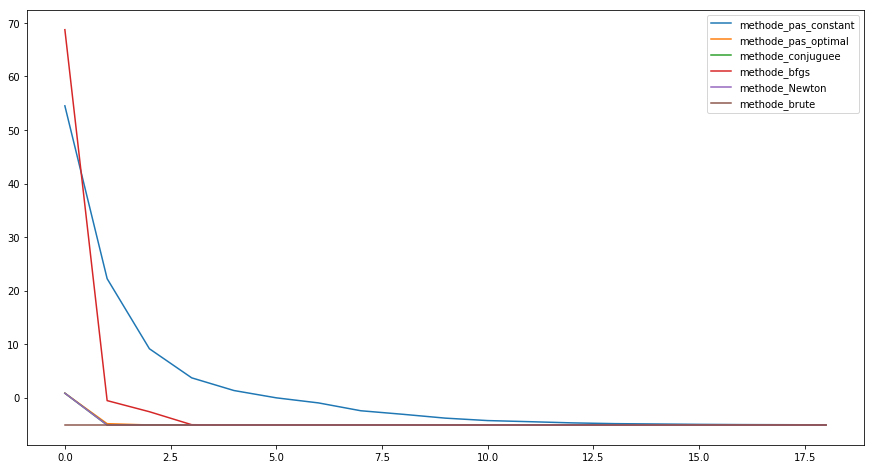

In [129]:
for methode in liste_methodes:
    plt.plot(precisions[methode],label=methode)
    plt.legend()

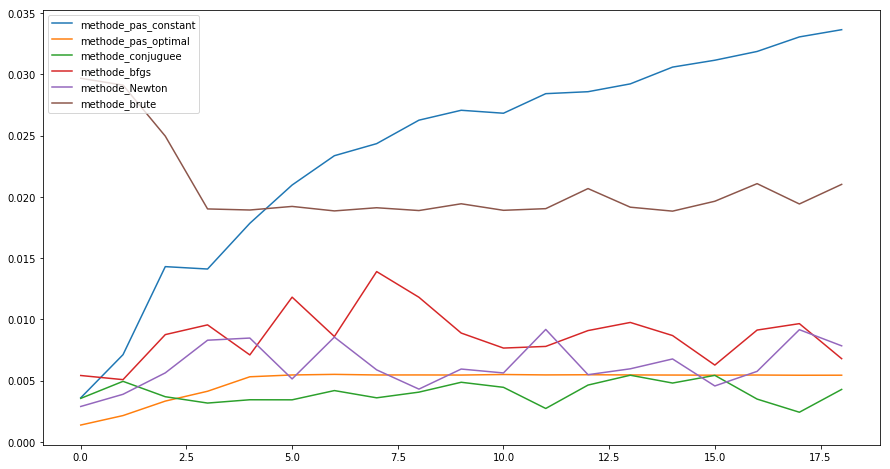

In [130]:
for methode in liste_methodes:
    plt.plot(durees[methode],label=methode)
    plt.legend()